# **Implementación de una técnica de aprendizaje máquina sin el uso de un framework**
### Módulo 2: Machine Learning
*Adrián Emmanuel Faz Mercado A01570770*

**Dataset**: plants_sunlight_data.csv


**Liga al dataset**: https://github.com/adrian-faz/Portafolio_Implementacion/blob/main/final/M2_ML/Entrega_NoFramework/plants_sunlight_data.csv



**Descripción del dataset**: El dataset de "plants_sunlight_data.csv" contiene registros de la cantidad de horas promedio al día que esta expuesta una planta al sol y una columna que indica si la planta sobrevivió después de un mes o no. El set de datos cuenta con 100 registros, y cada registro tiene las siguientes columnas:
* Hours_of_sunlight
* Survived

La columna de hours_of_sunlight tiene valores decimales entre 0 y 8 aproximadamente, y la columna de survived solo tiene las salidas 1 y 0, en donde 1 indica que la planta sobrevivió, y el 0 que la planta no sobrevivió.

**Problema a resolver**: El problema presentado se trata de **clasificación**, pues lo que se busca es crear un modelo que permita clasificar una muestra (planta) en base a la cantidad de horas promedio por día que estuvo bajo el sol después de un mes. Se trata de clasificación porque se busca que el modelo sea capaz de clasificar si el registro sobrevivió o no. Se trata de un problema de clasificación binomial, pues solamente hay 2 posibles salidas (Sobrevive o no).


## Carga de datos

Creamos las listas de los datos que estaremos utilizando, que en este caso son la cantidad de horas que la planta estuvo expuesta al sol por día y la variable que nos dice si sobrevivió al mes.

En este caso, estaremos utilizando datos que vienen de un archivo CSV, el cual solamente contiene 2 columnas, las horas promedio por día que pasó la planta en el sol ("Hours_of_Sunlight"), y la variable que nos indica si sobrevivió después de un mes. ("Survived").

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("plants_sunlight_data.csv")

# Crear lista con los valores de la variable independiente (hours_of_sunlight)
y = data["Survived"]
print(type(y))
x = data["Hours_of_Sunlight"]

# Dividimos nuestros datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

y_train = y_train.to_list()
y_test = y_test.to_list()

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [0.1,0.1]

# Cargamos el valor del learning rate (alpha)
alpha = 0.01

<class 'pandas.core.series.Series'>


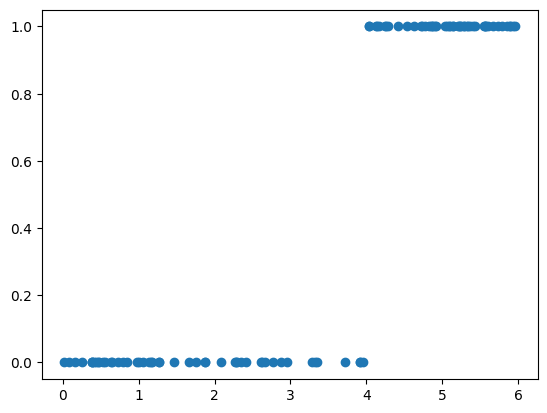

In [108]:
# Los datos se distribuyen de la siguiente manera.

plt.scatter(x,y)


Dada la gráfica, se espera que los valores que se encuentran entre 0 y 4 horas de sol por día en promedio no sobrevivan, mientras que los que están entre 4 y 6 horas sí sobreviven.

También ocupamos una alternativa que nos permita estimar fácilmente la variable dependiente y el total de muestras. Dado que implementaremos la función logística, ocupamos la función exponencial, por lo que requerimos el módulo **math**:

In [109]:
# Importar módulo math
import math
# Creamos la función lambda para la función de hipótesis
h = lambda x,theta: 1 / (1 + math.exp(-(theta[0]+theta[1]*x)))
# Calculamos el total de muestras a partir de los datos (n)
n = len(y_train)

Definimos el número de iteraciones a realizar para ajustar los valores de los thetas.

In [110]:
# Definir total de iteraciones a ejecutar
num_iter = 5000

## Iteraciones
En cada iteración debemos calcular el valor de la derivada de la función de costo, que se obtiene a partir de los datos estimados, $h_\theta(x_i)$, y reales, $y_i$ (recuerde que los estimados se obtienen con la función de hipótesis de la regresión logística):

$\frac{∂J_{θ}}{∂θ_0} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)$

$\frac{∂J_{θ}}{∂θ_1} = \frac{1}{n}\sum_{i=1}^{n}(h_θ(x_i)-y_i)x_i$

Además, debemos actualizar los valores de los hiper-parámetros, recordando que $\theta_j=\theta_j-\alpha \frac{∂J_{θ}}{∂θ_j}$:

In [111]:
# Implementamos ciclo para iteraciones
for _ in range(num_iter):
  delta = []
  delta1 = []
  for xi, yi in zip(X_train,y_train):
    pred = h(xi,theta)
    # Calculamos delta para theta0 y para cada muestra
    # Calculamos delta para theta1 y para cada muestra
    delta.append(pred-yi)
    delta1.append((pred-yi)*xi)

  # Calculamos sumatorias y promedio
  dJt0 = 1/n*sum(delta)
  dJt1 = 1/n*sum(delta1)

    # Actualizamos theta0
    # Actualizamos theta1

  theta0 = theta[0] - alpha*dJt0
  theta1 = theta[1] - alpha*dJt1
  theta = [theta0, theta1]

# Imprimimos nuestros thetas actualizado

print(theta)

[-3.805703801495704, 1.1656196419917213]


## Evaluación del modelo

Para probar el modelo, usaremos los datos de prueba que se definieron al inicio al dividir nuestros datos en entrenamiento y prueba.

Calcularemos predicciones para nuestro set de entrenamiento y para nuestro set de prueba, para analizar después métricas de desempeño de ambos.

In [112]:
# Creamos las listas donde se irán almacenando los resultados de las predicciones.

pred_train = []
pred_test = []

for xi in X_train:
  result = round(h(xi, theta))
  pred_train.append(result)

for xi in X_test:
  result = round(h(xi, theta))
  pred_test.append(result)

### **Definición de métricas**

Ahora que ya tenemos los valores de las predicciones con nuestras x de prueba, podemos obtener los valores de diferentes métricas para estimar que tan bueno es nuestro clasificador.

En este caso, vamos a trabajar con 2 métricas de desempeño en particular:
* **Accuracy**: Esta métrica nos permite conocer la proporción de predicciones correctas entre el número total de predicciones realizadas. Es la suma de verdaderos positivos y verdaderos negativos entre la cantidad total de pruebas.

   * $accuracy = \frac{VP+VN}{VP+VN+FP+FN}$

* **Precision**: La precisión nos indica la proporción de predicciones positivas que fueron efectivamente correctas. Se calcula dividiendo la

   * $precision = \frac{VP}{VP+FP}$




Para obtener estas métricas, es necesario obtener los valores de una matriz de confusión, la cual está compuesta por:

* Verdaderos positivos (VP) - El modelo predijo la clase positiva y la verdadera etiqueta también era positiva.
* Verdaderos negativos (VN) - El modelo predijo la clase negativa y la verdadera etiqueta también era negativa.
* Falsos positivos (FP) - El modelo predijo la clase positivo y la verdadera etiqueta era negativa.
* Falsos negativos (FN) - El modelo predijo la clase negativa y la verdadera etiqueta era positiva.

### Métricas de desempeño de datos de entrenamiento

In [113]:
# Inicializamos contadores para VP, FP, VN, FN

vp = 0
vn = 0
fp = 0
fn = 0

# Barremos nuestros datos reales y nuestras predicciones
for yr, yp in zip(y_train,pred_train):
  if yr == 1 and yp == 1:
    vp += 1
  elif yr == 0 and yp == 0:
    vn += 1
  elif yr == 1 and yp == 0:
    fn += 1
  elif yr == 0 and yp == 1:
    fp += 1
  else:
    print("Error")

print("Matriz de confusión")
print("---------------------")
# Imprimimos nuestra matriz de confusión
print(f"Verdaderos positivos: {vp}")
print(f"Verdaderos negativos: {vn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")

# Calculamos los valores de nuestras métricas
accuracy = round((vp + vn) / (vp + vn + fp + fn) * 100,2)
precision = round(vp / (vp + fp) * 100,2)


print("\nMétricas de desempeño")
print("---------------------")
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")

Matriz de confusión
---------------------
Verdaderos positivos: 41
Verdaderos negativos: 33
Falsos positivos: 6
Falsos negativos: 0

Métricas de desempeño
---------------------
Accuracy: 92.5%
Precision: 87.23%


En este caso, para los datos de entrenamiento, obtuvimos un porcentaje de accuracy de 92.5%, y uno de precisión de 87.23%. Estos son buenos porcentajes pues nos indican que la regresión se ajusta bastante bien a los datos de entrenamiento, sin embargo, también hay que revisar el desempeño en datos que no haya visto el modelo, para así verificar que funcione con datos generales.

### Métricas de desempeño de datos de prueba

In [114]:
# Inicializamos contadores para VP, FP, VN, FN

vp = 0
vn = 0
fp = 0
fn = 0

# Barremos nuestros datos reales y nuestras predicciones
for yr, yp in zip(y_test,pred_test):
  if yr == 1 and yp == 1:
    vp += 1
  elif yr == 0 and yp == 0:
    vn += 1
  elif yr == 1 and yp == 0:
    fn += 1
  elif yr == 0 and yp == 1:
    fp += 1
  else:
    print("Error")

print("Matriz de confusión")
print("---------------------")
# Imprimimos nuestra matriz de confusión
print(f"Verdaderos positivos: {vp}")
print(f"Verdaderos negativos: {vn}")
print(f"Falsos positivos: {fp}")
print(f"Falsos negativos: {fn}")


# Calculamos los valores de nuestras métricas
accuracy = round((vp + vn) / (vp + vn + fp + fn) * 100,2)
precision = round(vp / (vp + fp) * 100,2)

print("\nMétricas de desempeño")
print("---------------------")
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")

Matriz de confusión
---------------------
Verdaderos positivos: 9
Verdaderos negativos: 10
Falsos positivos: 1
Falsos negativos: 0

Métricas de desempeño
---------------------
Accuracy: 95.0%
Precision: 90.0%


Para los datos de prueba, se obtuvo un 95% de Accuracy y un 90% de Precision, los cuales son valores muy buenos y además están muy cercanos al desempeño de los datos de entrenamiento, lo cual nos indica que el modelo parece tener también una buena capacidad de clasificar datos que no han sido vistos.

En este caso, se analizó el efecto de la cantidad de horas promedio por día que una planta se expone al sol y en base a eso, tratamos de predecir si la planta va a sobrevivir o no.

Se trabajó con un una regresión logística con solamente 2 posibles salidas, buscando que se pueda clasificar si una planta sobreviviría o no sobreviviría, tomando como entrenamiento los datos que se le presentaron.

Se obtuvieron las métricas de desempeño del modelo tanto para los datos con los que se entrenó el modelo, como para los datos que se reservaron para prueba y que no han sido vistos por el modelo.

Se obtienen las métricas de ambos para verificar que el modelo no esté solamente memorizando los datos, y para revisar qué tan bien funciona con datos que no han sido vistos.

### **Comparación entre predicciones generadas y valores reales**

In [120]:
import random
# Seleccionamos 5 valores aleatorios del set de testing.
random_indices = random.sample(range(len(X_test)), 5)

# Usamos estos índices para seleccionar los valores respectivos de X y Y
random_x_test = X_test.iloc[random_indices]

# Creamos una lista para almacenar las predicciones y las y's reales de los índices seleccionados.
random_pred = []
real_y = []

for xi in random_x_test:
  pred = round(h(xi, theta))
  random_pred.append(pred)

for idx in random_indices:
  y1 = y_test[idx]
  real_y.append(y1)

# Creamos una tabla para comparar nuestros valores de prueba.
comparison_table = pd.DataFrame({
    'Predicted_y': random_pred,
    'Real_y': real_y
})

print("Comparison Table:")
print(comparison_table)

Comparison Table:
   Predicted_y  Real_y
0            1       1
1            0       0
2            0       0
3            0       0
4            0       0


En la prueba realizada, los 5 registros aleatorios que se seleccionaron fueron clasificados correctamente. Sin embargo, esto podría variar pues cada vez que se corre el bloque de código, se van a seleccionar diferentes pruebas del set total de pruebas.

Finalmente, como ejercicio extra, graficaremos la función a la que se llegó, la cual nos puede dar una idea de qué manera se comporta el modelo para los diferentes posibles valores de x (horas de sol).

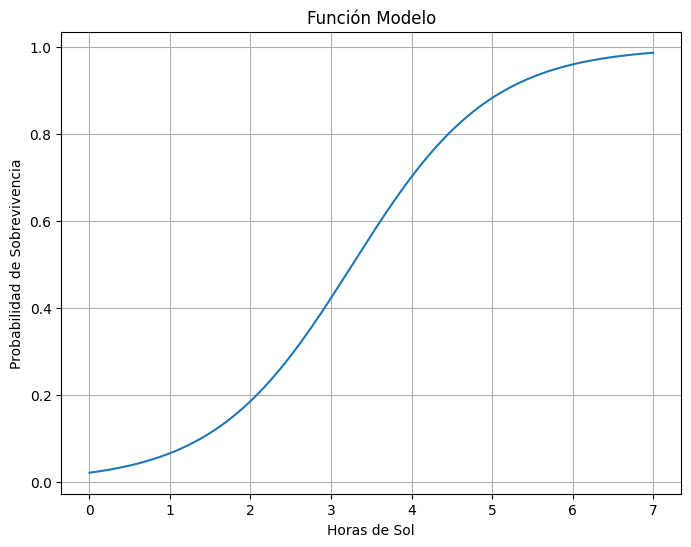

In [116]:
# Finalmente, la función del modelo se ve de la siguiente manera:

import matplotlib
import numpy as np

x = np.linspace(0, 7, 1000)

# Calcula y utilizando la función lambda para cada valor de x
y = [h(i,theta) for i in x]

# Graficando la función
plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.title('Función Modelo')
plt.xlabel('Horas de Sol')
plt.ylabel('Probabilidad de Sobrevivencia')
plt.grid(True)
plt.show()

# Para seguir analizando el modelo, habría que quizás usar más datos de entrenamiento y probar con diferentes valores iniciales de theta y modificar el learning rate.